In [1]:
import math
import pandas as pd
import numpy as np
from skimage import data , io , filters #Data for images , io for imshow , filters for prewitt
import matplotlib.pyplot as plt
import colorsys
%matplotlib inline

In [2]:
def display(img, isgray):
    plt.figure(dpi=150)
    if(isgray):
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.show()

In [3]:
def get_mags_and_dirs(img):
    r, c = img.shape[0], img.shape[1]
    mags = np.zeros((r, c, 3), dtype=float)
    dirs = np.zeros((r, c, 3), dtype=float)
    for i in range(3):
        comp = img[:,:,i]
        mags[:,:,i] = filters.sobel(comp)
        dirs[:,:,i] = np.arctan2(filters.sobel_h(comp), filters.sobel_v(comp))*180.0/np.pi
    return mags, dirs

In [4]:
def get_hist_grid(sub_img, cell_size):
    ri, ci = sub_img.shape[0], sub_img.shape[1] 
    r, c = (ri-1)//cell_size+1, (ci-1)//cell_size+1
    hist_grid = np.zeros((r, c, 18), dtype=float)
    for i in range(r):
        for j in range(c):
            cur_cell = np.zeros((cell_size, cell_size, 3), sub_img.dtype)
            ilo, iup, jlo, jup = i*cell_size, min((i+1)*cell_size, ri), j*cell_size, min((j+1)*cell_size, ci)
            cur_cell[:min(cell_size, iup-ilo),:min(cell_size, jup-jlo),:] = sub_img[ilo:iup,jlo:jup,:]
            mags, dirs = get_mags_and_dirs(cur_cell)
            for k in range(cell_size):
                for l in range(cell_size):
                    max_mag, its_dir = 0, 0
                    for m in range(3):
                        if(mags[k, l, m] > max_mag):
                            max_mag, its_dir = mags[k, l, m], dirs[k, l, m]
                    if(its_dir < 0):
                        its_dir = 360 + its_dir
                    flr = int(np.floor(its_dir/20))
                    lo, up = flr*20, (flr+1)*20
                    dl, du = its_dir-lo, up-its_dir
                    hist_grid[i, j, (lo//20)%18] += (1-dl/20.0)*max_mag
                    hist_grid[i, j, (up//20)%18] += (1-du/20.0)*max_mag
    return hist_grid

In [5]:
def Block_Normalization(h_array):
    R,C = len(h_array),len(h_array[0])
    giant_hist = []
    
    for i in range(R-1):
        for j in range(C-1):
            #Row-major concatenation
            big_hist = list(h_array[i][j]) + list(h_array[i][j+1]) + list(h_array[i+1][j]) + list(h_array[i+1][j+1])
            
            #Squaring the values
            big_hist_sq = [h ** 2 for h in big_hist]
            
            #Adding the values
            big_hist_sum = sum(big_hist_sq)
            
            #Getting the histogram magnitude
            big_hist_mag = math.sqrt(big_hist_sum)
            
            #Normalizing the historgram
            big_hist_norm = [m / big_hist_mag for m in big_hist]
            
            #Concatinating all the histograms
            giant_hist += big_hist_norm
            
    return giant_hist

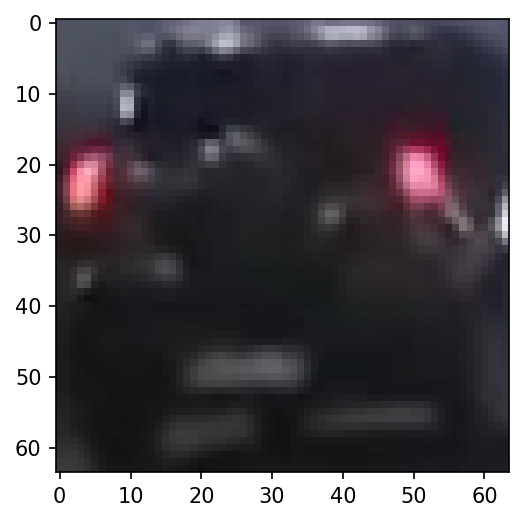

(64, 64, 3)
length of giant histogram:  3528


In [6]:
img = io.imread('image0974.png')
display(img, True)
print(img.shape)
hist_grid = get_hist_grid(img, 8)
#print("element ", 11, ", ", 16, " in histogram grid: ", hist_grid[11, 16, :])
giant_hist = Block_Normalization(hist_grid)
print("length of giant histogram: ", len(giant_hist))